## This Notebook is a solution of Best_Egg assighnment of a NLP Task. 

## Using the provided training data to build a functioning sentiment model to predict the score column. Use comments to document major steps (what and why) and any important decisions you make along the way. Choose an appropriate performance metric and display how well your model performs on the validation set.

## Data is downloaded from this public GitHub repo:

https://github.com/MarletteFunding/marlette-ds-challenge2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Upload data from Google Drive

In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
path='/content/drive/My Drive/Data_Sets/'
df_train = pd.read_csv(path+'NLP_task_train.csv.zip',header=0,index_col=0,compression='infer')
df_validate = pd.read_csv(path+'NLP_task_validate.csv.zip',header=0,index_col=0,compression='infer')

## Explore the data, Visulization target (Scores), handle missing data

In [5]:
df_train.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
0,583306034,1888104,The whole process went smooth and I am thankfu...,109,165,10.0
1,583306034,1888102,It was quick and easy to apply and got the app...,0,60,10.0
2,584193040,1909902,service,0,7,10.0
3,584203035,1910310,Thanks!,198,205,10.0
4,584200037,1910006,Thank you!,58,68,10.0


In [6]:
df_train.tail()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
70657,689569033,3973028,good communication on each step,25,56,8.0
70659,689548036,3972918,Applying for this loan was a very easy experience,0,49,10.0
70660,689549033,3973010,Was very helpful and stayed on phone to make s...,0,103,10.0
70661,689564034,3973230,High Interest Rates,0,19,8.0
70662,689550033,3973221,I appreciate this loan opportunity from Best E...,63,120,10.0


In [7]:
df_validate.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
7,584207033,1910601,The loan process was super easy,0,31,10.0
10,584199033,1909801,The process was quick and easy!,0,31,9.0
13,591377035,2116637,were in my bank within just a few days from th...,178,252,10.0
14,591377035,2116635,"I do not know what you mean by ""my score"", but...",0,131,10.0
25,34211545,359794,Very expensive dental work and debt consolidat...,0,50,10.0


In [8]:
df_validate.tail()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
70650,689544034,3973218,Also many options to choose from to fit my bud...,28,78,10.0
70652,689568034,3972921,paying bills,0,12,10.0
70655,689550034,3973223,It was quick and easy process,0,29,10.0
70656,689559033,3973021,Best Egg helped me to consolidate my high inte...,40,136,10.0
70658,689559033,3973023,Having paid off those loans and now needing an...,188,300,10.0


In [9]:
df_train.shape

(56644, 6)

In [10]:
df_validate.shape

(14019, 6)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56644 entries, 0 to 70662
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DOCUMENT_ID         56644 non-null  int64  
 1   SENTENCE_ID         56644 non-null  int64  
 2   SENTENCE            56623 non-null  object 
 3   SENTENCE_START_POS  56644 non-null  int64  
 4   SENTENCE_END_POS    56644 non-null  int64  
 5   SCORE               56644 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.0+ MB


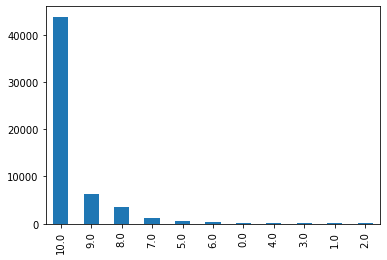

In [12]:
# Visualize SCORE distribution, total 11 scores, majority SCORE = 10
df_train['SCORE'].value_counts().plot(kind = 'bar')

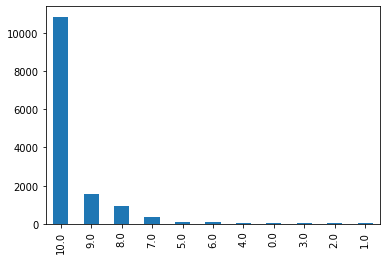

In [13]:
df_validate['SCORE'].value_counts().plot(kind = 'bar')

In [14]:
df_train.isnull().sum()

DOCUMENT_ID            0
SENTENCE_ID            0
SENTENCE              21
SENTENCE_START_POS     0
SENTENCE_END_POS       0
SCORE                  0
dtype: int64

In [15]:
#Remove the missing data 
df_train = df_train.dropna()

In [16]:
df_train.isnull().sum()

DOCUMENT_ID           0
SENTENCE_ID           0
SENTENCE              0
SENTENCE_START_POS    0
SENTENCE_END_POS      0
SCORE                 0
dtype: int64

In [17]:
df_train.shape

(56623, 6)

In [18]:
df_validate.isnull().sum()

DOCUMENT_ID           0
SENTENCE_ID           0
SENTENCE              4
SENTENCE_START_POS    0
SENTENCE_END_POS      0
SCORE                 1
dtype: int64

In [19]:
df_validate = df_validate.dropna()

In [20]:
df_validate.isnull().sum()

DOCUMENT_ID           0
SENTENCE_ID           0
SENTENCE              0
SENTENCE_START_POS    0
SENTENCE_END_POS      0
SCORE                 0
dtype: int64

In [ ]:
df_validate.shape

(14014, 6)

## Preprocess Sentences

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [22]:
# Define preprocess function, remove stop words and punctuations etc.
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    wordList = text.split()
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    wordList = [word for word in wordList if word not in stop]
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I Thank you!")

'thank'

In [23]:
# Clean train dataset
df_train["SENTENCE"] = df_train["SENTENCE"].astype("str")
df_train["clean_text"] = df_train["SENTENCE"].apply(clean_text)

In [24]:
# Clean validate dataset
df_validate["SENTENCE"] = df_validate["SENTENCE"].astype("str")
df_validate["clean_text"] = df_validate["SENTENCE"].apply(clean_text)

In [25]:
df_train.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE,clean_text
0,583306034,1888104,The whole process went smooth and I am thankfu...,109,165,10.0,whole process went smooth thankful
1,583306034,1888102,It was quick and easy to apply and got the app...,0,60,10.0,quick easy apply got approval quickly
2,584193040,1909902,service,0,7,10.0,service
3,584203035,1910310,Thanks!,198,205,10.0,thanks
4,584200037,1910006,Thank you!,58,68,10.0,thank


In [37]:
#save cleaned data to Google drive
#df_train.to_csv(path_or_buf='/content/drive/My Drive/Data_Sets/NLP_train.csv')
#df_validate.to_csv(path_or_buf='/content/drive/My Drive/Data_Sets/NLP_validate.csv')

In [4]:
#upload the cleaned data
#df_train = pd.read_csv('/content/drive/My Drive/Data_Sets/NLP_train.csv')
#df_validation = pd.read_csv('/content/drive/My Drive/Data_Sets/NLP_validate.csv')

In [10]:
#df_train['cat_score']=df_train.SCORE.astype('category').cat.codes

In [26]:
df_train.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE,clean_text
0,583306034,1888104,The whole process went smooth and I am thankfu...,109,165,10.0,whole process went smooth thankful
1,583306034,1888102,It was quick and easy to apply and got the app...,0,60,10.0,quick easy apply got approval quickly
2,584193040,1909902,service,0,7,10.0,service
3,584203035,1910310,Thanks!,198,205,10.0,thanks
4,584200037,1910006,Thank you!,58,68,10.0,thank


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56623 entries, 0 to 70662
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DOCUMENT_ID         56623 non-null  int64  
 1   SENTENCE_ID         56623 non-null  int64  
 2   SENTENCE            56623 non-null  object 
 3   SENTENCE_START_POS  56623 non-null  int64  
 4   SENTENCE_END_POS    56623 non-null  int64  
 5   SCORE               56623 non-null  float64
 6   clean_text          56623 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.5+ MB


## Import dependences

In [73]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from keras import backend as K

In [74]:
from keras.preprocessing import text, sequence
from keras import optimizers
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, Conv1D, GRU, LSTM, MaxPooling1D, GlobalMaxPool1D
from keras.layers.wrappers import Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import gc



##Split xtrain, ytrain from df_train; xtest, ytest from df_validate;
## one hot encoder 'SCORE'

In [77]:
xtrain = df_train['clean_text']
ytrain = df_train['SCORE']
xtest = df_validate['clean_text']
ytest = df_validate['SCORE']

In [78]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto',sparse=False)
ohe.fit(ytrain.values.reshape(-1,1))
max_len=200
max_num_words=20000
tokenizer = text.Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(xtrain)

xtrain = tokenizer.texts_to_sequences(xtrain)
xtrain = sequence.pad_sequences(xtrain, maxlen = max_len).astype(np.int32)
ytrain = ohe.transform(ytrain.values.reshape(-1,1)).astype(np.uint8)

xtest = tokenizer.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(xtest, maxlen = max_len).astype(np.int32)
ytest = ohe.transform(ytest.values.reshape(-1,1)).astype(np.uint8)

#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)
#del X, y
#gc.collect()

## Build word embedding matrix from glove 100d

In [79]:
f= open('/content/drive/My Drive/Data_Sets/glove.6B.100d.txt', 'r', encoding='utf-8')
embeddings_index={}
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except ValueError:
        pass
f.close()

word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Build Neural Network model using Bidtrectional GRU
## Train the model

In [80]:
nlabels=11

model = Sequential()
model.add(Embedding(len(word_index)+1,
                           100,
                           weights=[embedding_matrix],
                           input_length=max_len,
                           trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(GRU(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(GRU(128, dropout=0.3, recurrent_dropout=0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.8))

model.add(layers.Dense(nlabels, activation='softmax')) #'sigmoid'
model.compile(loss='categorical_crossentropy',
                optimizer='adam', 
                metrics=['acc'])
model.summary()

batch=512
epoch=5

history = model.fit(xtrain, ytrain,
                    validation_split=0.2,
                    epochs=epoch,
                    batch_size=batch,
                   verbose=1)
score, acc = model.evaluate(xtest, ytest,
                            batch_size=batch)
model.save('gru_model.h5')



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 100)          737400    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 200, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_8 (Bidirectio  (None, 200, 256)         176640    
 nal)                                                            
                                                                 
 gru_17 (GRU)                (None, 128)               148224    
                                                                 
 dense_16 (Dense)            (None, 512)               66048     
                                                                 
 dropout_8 (Dropout)         (None, 512)              

## Plot loss and Accuracy vs. Epoch

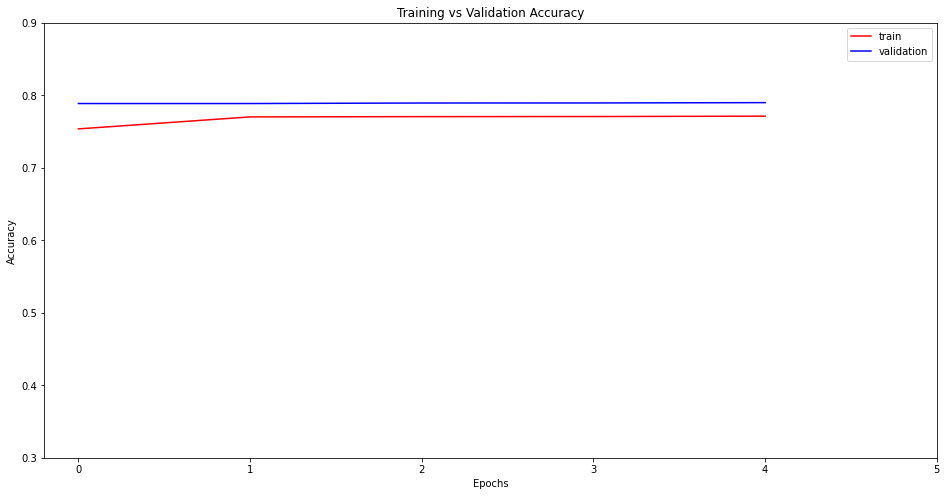

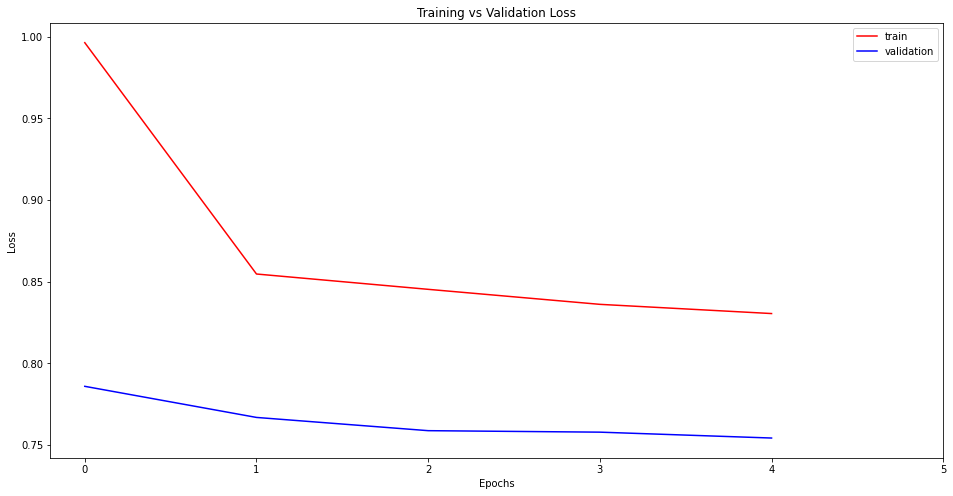

In [81]:
plt.figure(figsize = (16, 8))
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.rcParams['figure.figsize'] = (5, 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

## Classification report, precision, recall, F1 score, support and ACC, Confusion matrix

In [82]:
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis=1)
ytest = np.argmax(ytest, axis=1)

In [83]:
from sklearn.metrics import classification_report
classification_report(ytest, ypred, output_dict = True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 35},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 17},
 '10': {'f1-score': 0.8755544802000162,
  'precision': 0.7791014783981628,
  'recall': 0.9992636229749632,
  'support': 10864},
 '2': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 20},
 '3': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 26},
 '4': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 46},
 '5': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 111},
 '6': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 97},
 '7': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 332},
 '8': {'f1-score': 0.052845528455284556,
  'precision': 0.325,
  'recall': 0.028761061946902654,
  'support': 904},
 '9': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 1562},
 'accuracy': 0.7765092050806337,
 'macro avg': {'f1-score': 0.08440000078684552,
  'precision':

In [84]:
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
print(classification_report(ytest, ypred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00       111
           6       0.00      0.00      0.00        97
           7       0.00      0.00      0.00       332
           8       0.33      0.03      0.05       904
           9       0.00      0.00      0.00      1562
          10       0.78      1.00      0.88     10864

    accuracy                           0.78     14014
   macro avg       0.10      0.09      0.08     14014
weighted avg       0.62      0.78      0.68     14014



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[   0    0    0    0    0    0    0    0    4    0   40]
 [   0    0    0    0    0    0    0    0    2    0   13]
 [   0    0    0    0    0    0    0    0    0    0   13]
 [   0    0    0    0    0    0    0    0    5    0   25]
 [   0    0    0    0    0    0    0    0    2    0   38]
 [   0    0    0    0    0    0    0    0   14    0   98]
 [   0    0    0    0    0    0    0    0    9    0   77]
 [   0    0    0    0    0    0    0    0   21    0  222]
 [   0    0    0    0    0    0    0    0   27    0  690]
 [   0    0    0    0    0    0    0    0    4    0 1194]
 [   0    0    0    0    0    0    0    0   13    0 8814]]


## Summary and Improvement:

## 1. Using bidirectional GRU Neural Network the acc reached 0.78.
## 2. However, the data is very imbalanced, it is hard to predict the minority categories.
## Improvement:
## 1. From data processing point of view:
## Undersampling score 10 and oversampling other scores; or combine scores 0 to 8 as class 1, score 9 as class 2, score 10 as class 3.
## 2. From the Accuracy and Loss curves we can increase the model complex by add more GRU layers, or combine CNN/GRU, CNN/LSTM etc. to increase model accuracy;
## 3. Fine tune hyperparameters: batch size, learning rate, epocks, units in each layer, dropout rate, embedding dimentions etc. 
## 4. Try transformer, BERT which might be outperformence GRU etc. recurrent neural networks.

